<a href="https://colab.research.google.com/github/RamomNF/GoogleColab/blob/master/ML-Bootcamp/R/MLwRBootcamp_ClaClu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Bibliotecas de uso geral
install.packages(c("tidyverse", "caTools", "GGally", "rio"))
library('tidyverse')
library('magrittr') #Para poder usar pipes específicos
library('caTools')
library('GGally')
library('rio')

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zip’, ‘data.table’, ‘openxlsx’




---
# **KNN Method**
---

[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) 150x5

* Species
* Sepal.Length	
* Sepal.Width
* Petal.Length
* Petal.Width	


In [70]:
#####################################################################
#                                                                   #
###                                                               ###
#####                K Nearest Neighbors Project                #####
###                                                               ###
#                                                                   #
#####################################################################

In [71]:
#Bibliotecas para o KNN
install.packages("class")
library("class")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [72]:
#Vamos usar o conhecido banco iris
data("iris")

#Já conheço esse banco, não tem nada faltando nele, mas vou dar uma geral
iris %>%
  head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [73]:
#Não possui NA's
iris %>%
  is.na() %>%
  summary()

 Sepal.Length    Sepal.Width     Petal.Length    Petal.Width    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:150       FALSE:150       FALSE:150       FALSE:150      
  Species       
 Mode :logical  
 FALSE:150      

In [74]:
#Temos o label e 4 variáveis numéricas
iris %>%
  glimpse()

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, …


In [75]:
#Escala dos dados
iris %>%
  summary()

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [76]:
#Para o algoritmo de KNN a escala das variáveis importa, pois calculamos a distância e se uma variável tem uma escala muito maior
#ela também tende a ter um peso maior no cálculo da distância
#Existem diferentes formas de reescalonar os dados, vou reescalonar tudo entre 0 e 1.

#Vou copiar os dados numéricos
scaled_iris = iris[,-5]

#Obter os maximos e mínimos
maxs = apply(scaled_iris, 2, max)
mins = apply(scaled_iris, 2, min)

#Reescalonar subtraindo o mínimo e dividindo por máximo-mínimo
scaled_iris %<>% scale(center=mins, scale= maxs-mins)

#Nova Escala
scaled_iris %>%
 summary()

  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

In [90]:
#Com essa nova escala, todas as variáveis devem ter o mesmo peso
#Então vou separar os dados em treino e teste na proporção 70/30

#Primeiro vou deixar uma semente fixa para reprodutividade, depois vou gerar um vetor aleatório para o teste
set.seed(1215)
train = caTools::sample.split(iris$Species, SplitRatio = .7)

#Vou separar os dados reescalonados em treino e teste
iris_train = scaled_iris[ train,]
iris_test  = scaled_iris[!train,]

#e as etiquetas em treino e teste
species_train = iris[ train,'Species']
species_test  = iris[!train,'Species']

In [91]:
#Predizer as classificações é fácil, basta decidir um k.
predicted = class::knn(iris_train, iris_test, species_train, k=1)
mean(species_test != predicted) #Taxa de erro 6.7%

[1] 0.06666667

In [92]:
#Vou usar o método do cotovelo para decidir um K, o ideal é ter um dataset um pouco maior, mas ok
#Aqui parece que um k=7 estaria bom
taxa_erro <- function(k, train_data, test_data, train_label, test_label){
  predicted  = class::knn(train_data, test_data, train_label, k)
  error_rate = mean(test_label != predicted)
  return( error_rate )
}

sapply(1:20, taxa_erro, iris_train, iris_test, species_train, species_test)

[1] 0.06666667 0.08888889 0.06666667 0.08888889 0.06666667 0.06666667
 [7] 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
[13] 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444 0.04444444
[19] 0.04444444 0.04444444

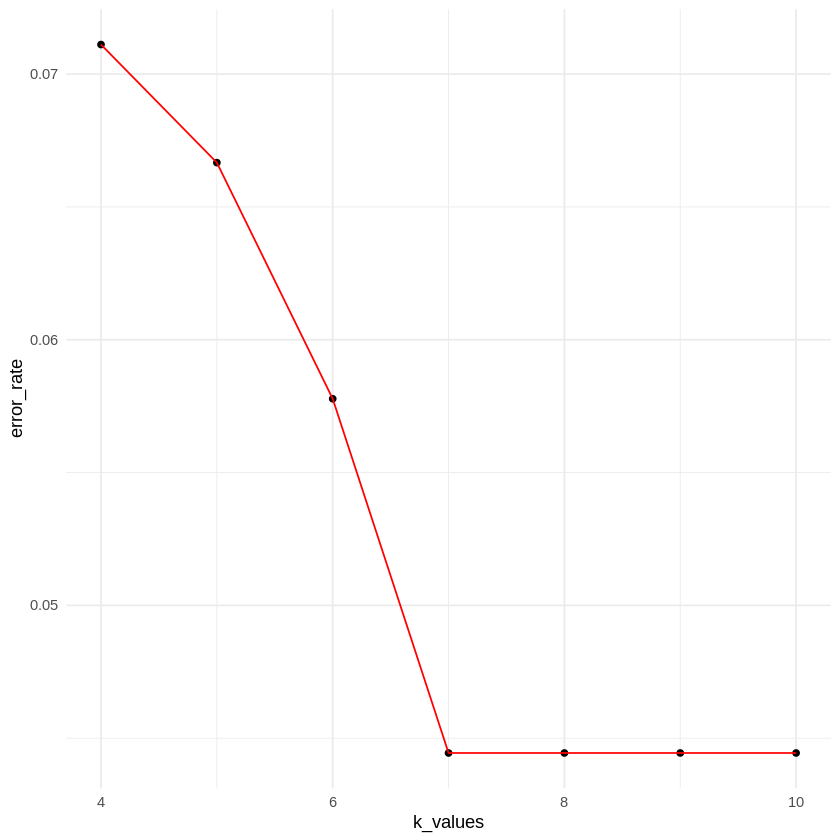

In [93]:
#Como esse conjunto de dados é pequeno, posso me dar ao luxo de fazer vários testes antes de decidir por um k
k_values = 4:10
error_rate = rep(0, length(k_values))
replicates = 5

for( i in 1:replicates){
  error_rate = error_rate + sapply(k_values, taxa_erro, iris_train, iris_test, species_train, species_test)
}

error_rate = error_rate / replicates

data.frame(error_rate, k_values) %>%
 ggplot() +
   aes(x = k_values, y = error_rate) +
   geom_point() +
   geom_line(color='red') + 
   theme_minimal()

In [89]:
#Então, para esse conjunto de dados o k = 7 se mostrou com menor taxa de erro
predicted = class::knn(iris_train, iris_test, species_train, k=7)

print("Classification Table:")
table(predicted, species_test)

cat('\n\n')
print("Error Rate:")
mean(predicted != species_test)

[1] "Classification Table:"


            species_test
predicted    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         2
  virginica       0          0        13



[1] "Error Rate:"


[1] 0.04444444

---
# **Tree Based Methods**
---

[College dataset](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf)  777x18

* Private A factor with levels No and Yes indicating private or public university

* Apps Number of applications received

* Accept Number of applications accepted

* Enroll Number of new students enrolled

* Top10perc Pct. new students from top 10% of H.S. class

* Top25perc Pct. new students from top 25% of H.S. class

* F.Undergrad Number of fulltime undergraduates

* P.Undergrad Number of parttime undergraduates

* Outstate Out-of-state tuition

* Room.Board Room and board costs

* Books Estimated book costs

* Personal Estimated personal spending

* PhD Pct. of faculty with Ph.D.’s

* Terminal Pct. of faculty with terminal degree

* S.F.Ratio Student/faculty ratio

* perc.alumni Pct. alumni who donate

* Expend Instructional expenditure per student

* Grad.Rate Graduation rate

In [ ]:
#####################################################################
#                                                                   #
###                                                               ###
#####                    Tree Methods Project                   #####
###                                                               ###
#                                                                   #
#####################################################################

In [3]:
install.packages(c('ISLR', 'rpart', 'rpart.plot', 'randomForest'))
library("ISLR")
library("rpart")
library("rpart.plot")
library("randomForest")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [4]:
#Os dados estão no pacote ISLR, do livro Introduction to Statistical Learning (ótima leitura introdutória)
data("College")

#Cara dos dados
College %>%
  head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
#Nenhum NA, não significa que não tenham campos em branco ou outro símbolo representando NA
College %>%
  is.na() %>%
  summary()

  Private           Apps           Accept          Enroll       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:777       FALSE:777       FALSE:777       FALSE:777      
 Top10perc       Top25perc       F.Undergrad     P.Undergrad    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:777       FALSE:777       FALSE:777       FALSE:777      
  Outstate       Room.Board        Books          Personal      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:777       FALSE:777       FALSE:777       FALSE:777      
    PhD           Terminal       S.F.Ratio       perc.alumni    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:777       FALSE:777       FALSE:777       FALSE:777      
   Expend        Grad.Rate      
 Mode :logical   Mode :logical  
 FALSE:777       FALSE:777      

In [6]:
#Estrutura dos dados, uma variável categórica e diversas variáveis numéricas
College %>%
  glimpse()

Rows: 777
Columns: 18
$ Private     <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Ye…
$ Apps        <dbl> 1660, 2186, 1428, 417, 193, 587, 353, 1899, 1038, 582, 17…
$ Accept      <dbl> 1232, 1924, 1097, 349, 146, 479, 340, 1720, 839, 498, 142…
$ Enroll      <dbl> 721, 512, 336, 137, 55, 158, 103, 489, 227, 172, 472, 484…
$ Top10perc   <dbl> 23, 16, 22, 60, 16, 38, 17, 37, 30, 21, 37, 44, 38, 44, 2…
$ Top25perc   <dbl> 52, 29, 50, 89, 44, 62, 45, 68, 63, 44, 75, 77, 64, 73, 4…
$ F.Undergrad <dbl> 2885, 2683, 1036, 510, 249, 678, 416, 1594, 973, 799, 183…
$ P.Undergrad <dbl> 537, 1227, 99, 63, 869, 41, 230, 32, 306, 78, 110, 44, 63…
$ Outstate    <dbl> 7440, 12280, 11250, 12960, 7560, 13500, 13290, 13868, 155…
$ Room.Board  <dbl> 3300, 6450, 3750, 5450, 4120, 3335, 5720, 4826, 4400, 338…
$ Books       <dbl> 450, 750, 400, 450, 800, 500, 500, 450, 300, 660, 500, 40…
$ Personal    <dbl> 2200, 1500, 1165, 875, 1500, 675, 1500, 850, 500, 1800, 6…
$ PhD         <dbl> 70, 29, 53

In [7]:
#Estatísticas resumo
College %>%
  summary()

#Grad.Rate tem um valor máximo acima de 100, com certeza é um erro
#Também acho estranho nenhum aluno ter doado (perc.alumni = 0.00), mas é um valor possível
#Algumas variáveis tem distribuição bem assimétrica com média bem diferente de mediada

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

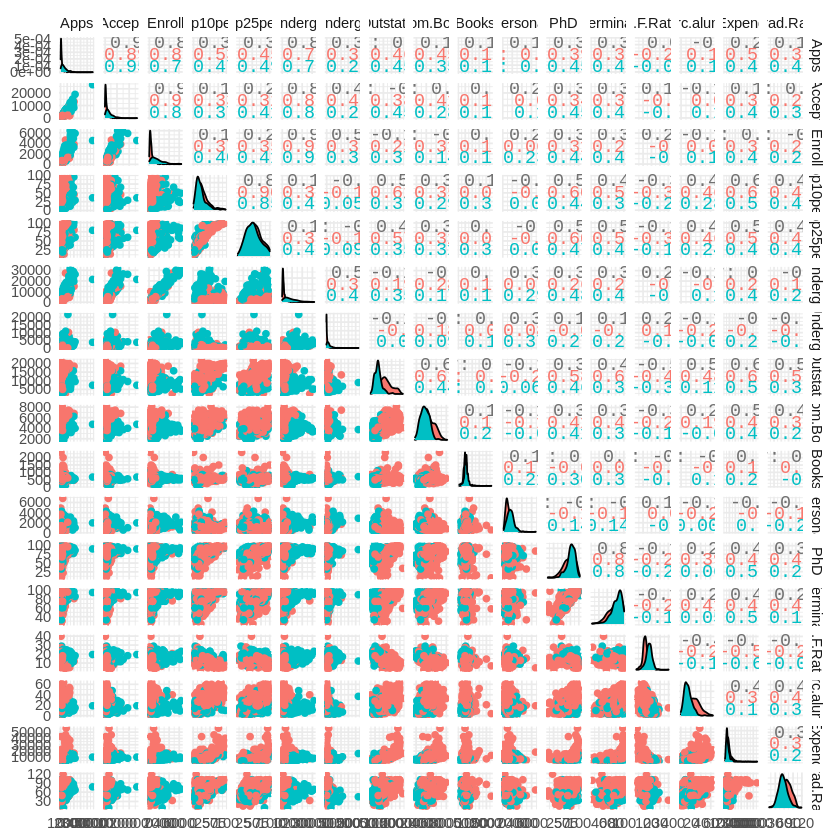

In [8]:
#Análise Exploratória

#No RStudio da visualizar melhor esse gráfico, o mais interessante é ver que algumas variáveis parecem
#ter comportamentos distintos para a Univers. Privada e Pública
College$Private %<>% relevel(ref = "Yes")
GGally::ggpairs(College, columns = 2:ncol(College), ggplot2::aes(colour=Private)) + theme_minimal()



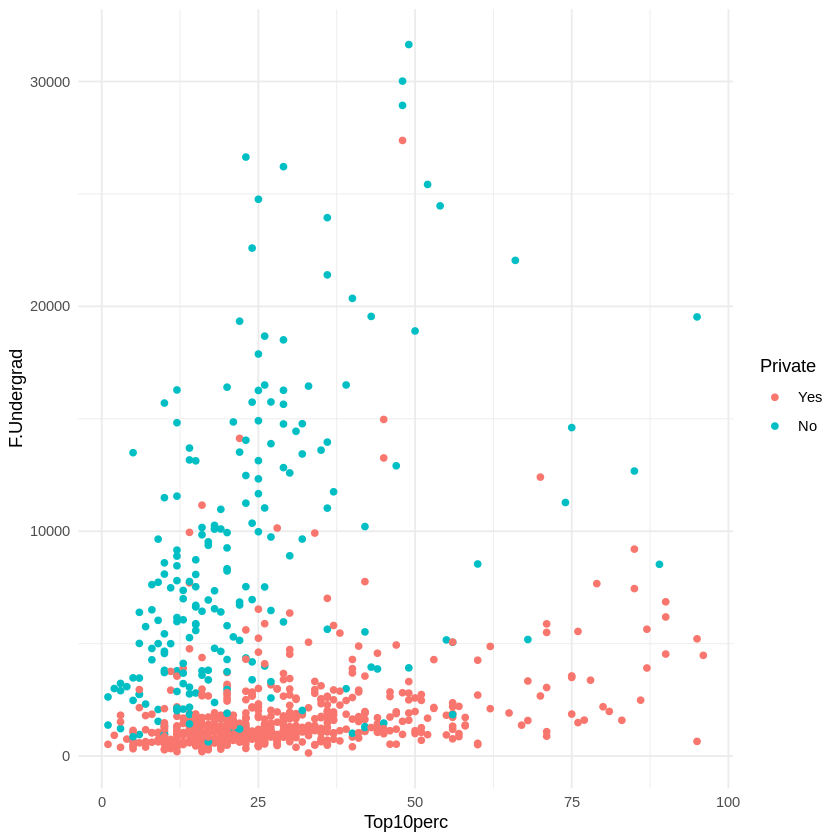

In [9]:
#Vemos dois grupos distintos, aparentemente as univ privadas não tem tantos estudantes em período integral como 
#as públicas, mas ainda assim conseguem ter vários no top 10
College %>%
 ggplot() +
  aes(x = Top10perc, y = F.Undergrad, color=Private) +
  geom_point() +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



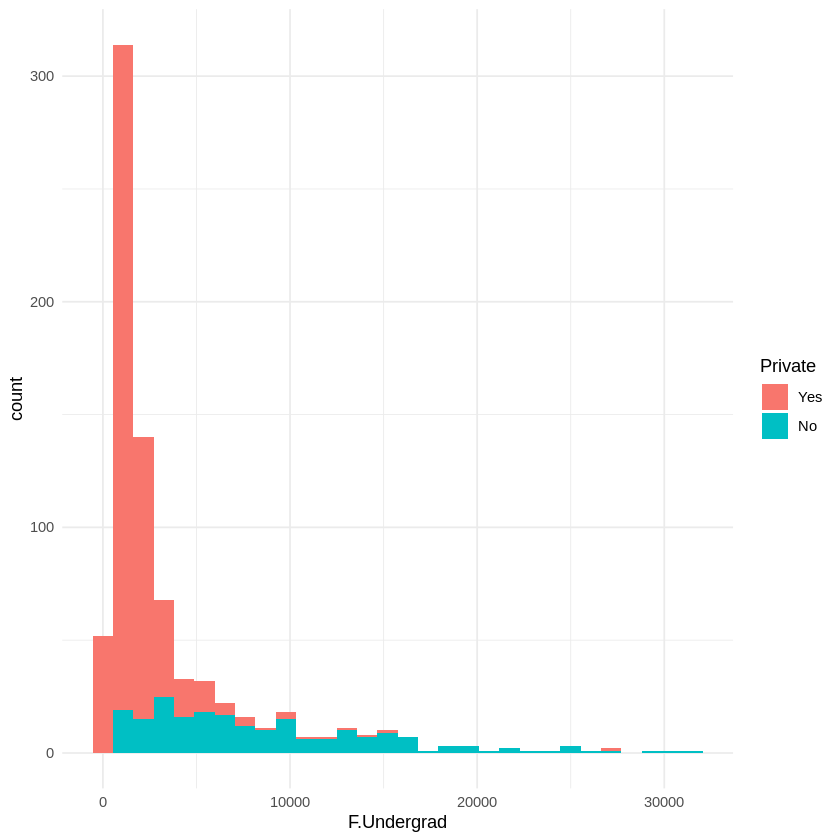

In [10]:
#Nos dados tem muito mais universidade privada com pouco estudante em período integral
College %>%
 ggplot() +
  aes(x = F.Undergrad, fill=Private ) +
  geom_histogram() +
  scale_fill_hue(name="Private") +
  theme_minimal()

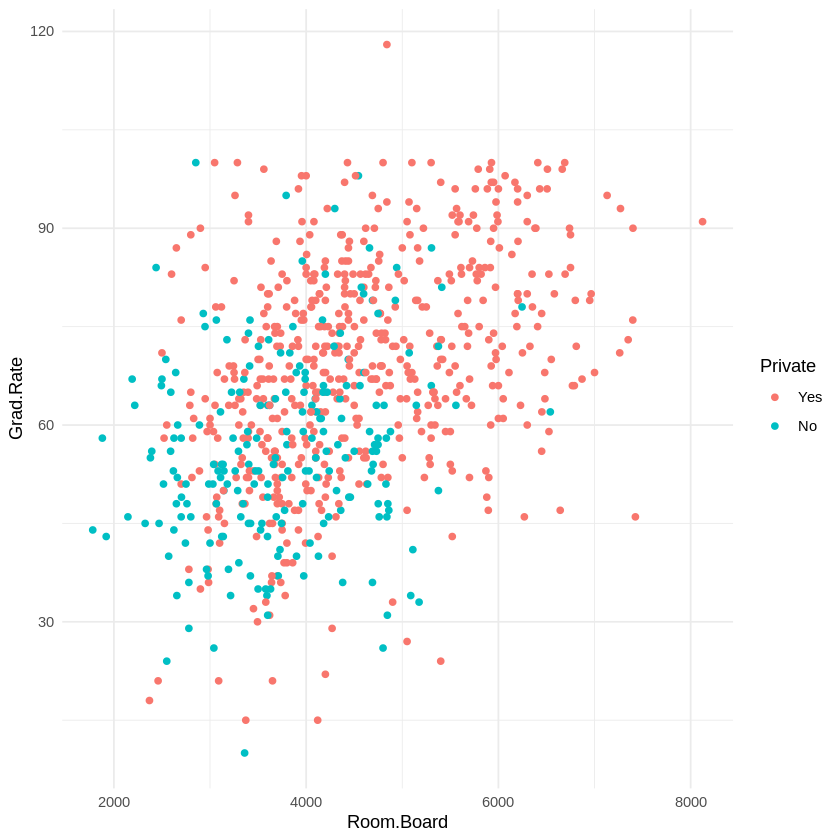

In [11]:
#Nesse caso, o comportamento não é tão distinto entre privada e não privada
College %>%
 ggplot() +
  aes(x = Room.Board, y = Grad.Rate, color=Private) +
  geom_point() +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



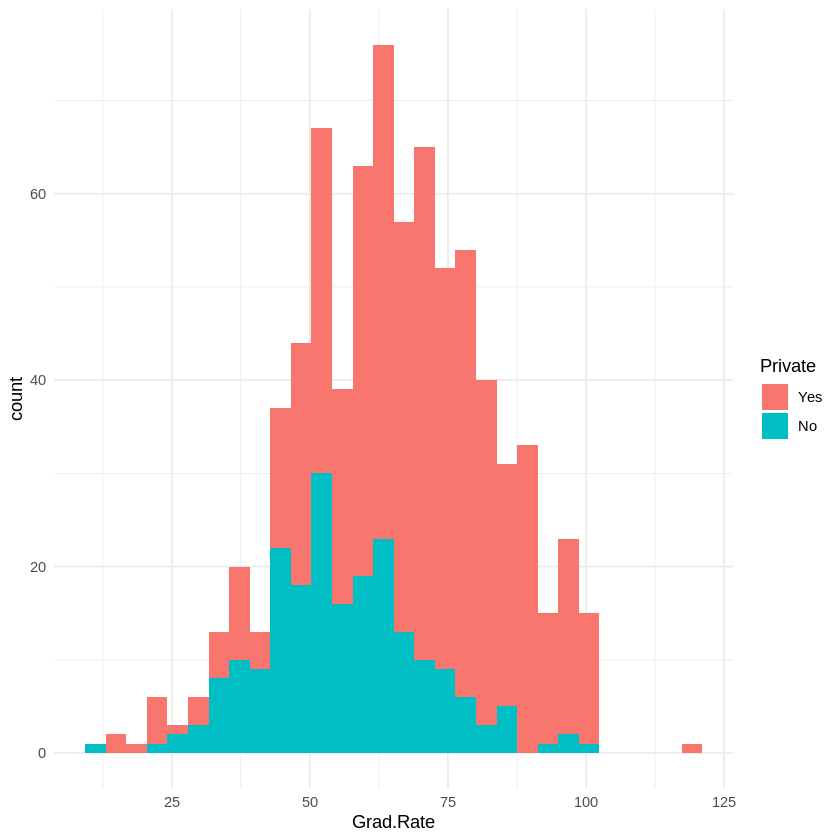

In [12]:
#Aquele valor errado aparecendo de novo
College %>%
 ggplot() +
  aes(x = Grad.Rate, fill=Private ) +
  geom_histogram() +
  scale_fill_hue(name="Private") +
  theme_minimal()

In [13]:
#O valor de doação como 0 deixarei como está, mas essa taxa de graduação vou alterar

College$Grad.Rate[College$Grad.Rate>100] = 100

In [14]:
#Primeiro vou deixar uma semente fixa para reprodutividade
#Depois vou criar um vetor de treino e teste na proporção 70/30
set.seed(1215)
train = caTools::sample.split(College$Private, SplitRatio = .7)

#Vou separar os dados  em treino e teste
College_train = College[ train,]
College_test  = College[!train,]


# **Decision Tree**

In [20]:
#Árvore de Decisão
set.seed(7233)
tree = rpart::rpart(Private ~., method = 'class', data=College_train)

#Só 3 variáveis foram usadas
#A raiz é F.Undergrad que já vimos ter uma distribuição bem distinta
#As demais são Outstate e Room.Board
rpart::printcp(tree)


Classification tree:
rpart::rpart(formula = Private ~ ., data = College_train, method = "class")

Variables actually used in tree construction:
[1] F.Undergrad Outstate    Room.Board 

Root node error: 148/544 = 0.27206

n= 544 

        CP nsplit rel error  xerror     xstd
1 0.479730      0   1.00000 1.00000 0.070132
2 0.216216      1   0.52027 0.60135 0.058296
3 0.060811      2   0.30405 0.41216 0.049725
4 0.013514      3   0.24324 0.41892 0.050079
5 0.010135      4   0.22973 0.44595 0.051455
6 0.010000      6   0.20946 0.45270 0.051789


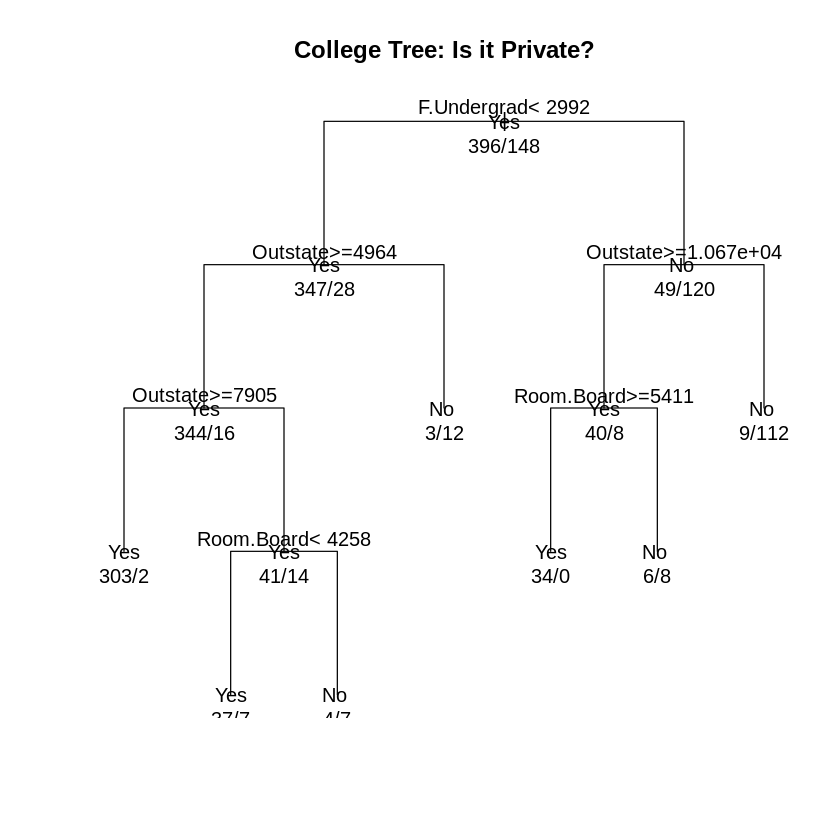

In [21]:
plot(tree, uniform=T, main='College Tree: Is it Private?')
text(tree, use.n=T, all=T)

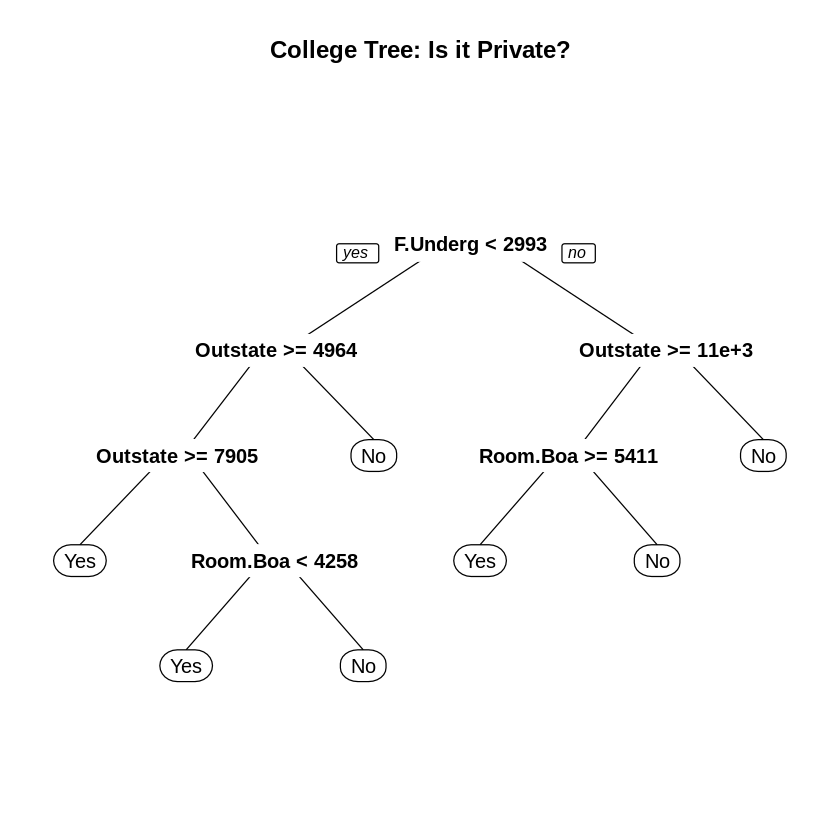

In [25]:
rpart.plot::prp(tree, main='College Tree: Is it Private?')

In [75]:
#O resultado da previsão é uma matriz, a soma de cada linha é 1, tem uma probabilidade associada a cada resultado
predicted = predict(tree, College_test)

predicted %>%
  head()

,Yes,No
Adelphi University,0.9934426,0.006557377
Albion College,0.9934426,0.006557377
Alfred University,0.9934426,0.006557377
Allegheny College,0.9934426,0.006557377
Alverno College,0.9934426,0.006557377
Anderson University,0.9934426,0.006557377


In [76]:
#Vou colocar a classificação no mesmo formato dos dados
predicted = 
  predicted[,"Yes"] %>%
  round() %>%
  as.factor() %>%
  relevel(ref="1")

levels(predicted) <- c("Yes", "No")

head(predicted)

Adelphi University      Albion College   Alfred University   Allegheny College 
                Yes                 Yes                 Yes                 Yes 
    Alverno College Anderson University 
                Yes                 Yes 
Levels: Yes No

In [77]:
#Matriz de Confusão
cm = table(predicted, College_test$Private)
cm

         
predicted Yes  No
      Yes 154   8
      No   15  56

In [57]:
#Acurácia P(Acerto)
accuracy = sum(diag(cm)) / sum(cm)
accuracy

[1] 0.9012876

In [61]:
#Sensitividade P(Yes | Yes)
#Tbm chamado de precisão, é a probabilidade de detectar quando existe
sensitivity = cm[1,1] / sum(cm[,1])
sensitivity

[1] 0.9112426

In [63]:
#Especificidade P(No | No)
#É a probabilidade de não detectar quando não existe, geralmente há um trade-off entre Sensitividade e Especificidade
specificity = cm[2,2] / sum(cm[,2])
specificity

[1] 0.875

# **Random Forest**

In [91]:
#A floresta aleatória é uma coleção de árvores aleatórias com subset de variáveis
set.seed(7233)
forest = randomForest::randomForest(Private ~., data=College_train)
forest


Call:
 randomForest(formula = Private ~ ., data = College_train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 5.51%
Confusion matrix:
    Yes  No class.error
Yes 385  11  0.02777778
No   19 129  0.12837838

In [94]:
# Novamente, as variáveis Outstate e F.Undergrad se destacam, mas duas variáveis (Enroll e P.Undergrad)
#aparecem com mais importância que Room.Board .
forest$importance %>%
  as.data.frame() %>%
  arrange(-MeanDecreaseGini)


,MeanDecreaseGini
,<dbl>
Outstate,42.686973
F.Undergrad,42.105803
Enroll,22.866402
P.Undergrad,14.158135
Room.Board,12.782109
Accept,12.061595
S.F.Ratio,11.900315
Expend,11.052875
Apps,10.402914


In [86]:
#O resultado da previsão é uma matriz, a soma de cada linha é 1, tem uma probabilidade associada a cada resultado
predicted = predict(forest, College_test)

predicted %>%
  head()

Adelphi University      Albion College   Alfred University   Allegheny College 
                Yes                 Yes                 Yes                 Yes 
    Alverno College Anderson University 
                Yes                 Yes 
Levels: Yes No

In [87]:
#Matriz de Confusão
cm = table(predicted, College_test$Private)
cm

         
predicted Yes  No
      Yes 163   8
      No    6  56

In [88]:
#Acurácia P(Acerto)
#A Floresta aleatória foi mais acurada que a árvore de decisão
accuracy = sum(diag(cm)) / sum(cm)
accuracy

[1] 0.9399142

In [89]:
#Sensitividade P(Yes | Yes)
#Tbm chamado de precisão, é a probabilidade de detectar quando existe
#A Floresta aleatória foi mais sensível que a árvore de decisão
sensitivity = cm[1,1] / sum(cm[,1])
sensitivity

[1] 0.964497

In [90]:
#Especificidade P(No | No)
#É a probabilidade de não detectar quando não existe, geralmente há um trade-off entre Sensitividade e Especificidade
#Em termos de especificidade, não teve diferença entre floresta aleatória e árvore de decisão
specificity = cm[2,2] / sum(cm[,2])
specificity

[1] 0.875

  Para esse dataset, com essa divisão de treino e teste, a floresta aleatória foi melhor que a árvore de decisão. Porém, a árvore de decisão é muito mais explicável dado que temos regras simples de divisão nas variáveis baseadas na minimização da entropia / maximização do ganho de informação.

  Assim, baseado em qual métrica estamos usando (acurácia, sensibilidade ou especificidade) e a importância da explicabilidade, devemos escolher o que melhor se encaixa na situação problema.

---
# **Support Vector Machines**
---

[LendingClub Dataset](https://www.lendingclub.com/info/download-data.action)

*  credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

*  purpose: The purpose of the loan (takes values "credit_card", 
"debt_consolidation", "educational", "major_purchase", 
"small_business", and "all_other").

*  int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by 
LendingClub.com to be more risky are assigned higher interest rates.

*  installment: The monthly installments owed by the borrower if the loan is funded.

*  log.annual.inc: The natural log of the self-reported annual income of the borrower.

*  dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

*  fico: The FICO credit score of the borrower.

*  days.with.cr.line: The number of days the borrower has had a credit line.

*  revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

*  revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

*  inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

*  delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

*  pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [37]:
#####################################################################
#                                                                   #
###                                                               ###
#####              Support Vector Machine Project               #####
###                                                               ###
#                                                                   #
#####################################################################

In [38]:
install.packages('e1071')
library('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
#Vamos tentar classificar e predizer se o tomador de empréstico pagou a conta por inteiro
trying to classify and predict whether or not the borrower paid back their loan in full.
loans = rio::import("https://raw.githubusercontent.com/RamomNF/GoogleColab/master/ML-Bootcamp/R/loan_data.csv")

In [8]:
#Cara do banco
loans %>%
 head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1,debt_consolidation,0.1189,829.10,11.35041,19.48,737,5639.958,28854,52.1,0,0,0,0
2,1,credit_card,0.1071,228.22,11.08214,14.29,707,2760.000,33623,76.7,0,0,0,0
3,1,debt_consolidation,0.1357,366.86,10.37349,11.63,682,4710.000,3511,25.6,1,0,0,0
4,1,debt_consolidation,0.1008,162.34,11.35041,8.10,712,2699.958,33667,73.2,1,0,0,0
5,1,credit_card,0.1426,102.92,11.29973,14.97,667,4066.000,4740,39.5,0,1,0,0
6,1,credit_card,0.0788,125.13,11.90497,16.98,727,6120.042,50807,51.0,0,0,0,0


In [9]:
#As variáveis inteiras parecem ser categoriais, a de caracter tbm.
loans %>%
  glimpse()

Rows: 9,578
Columns: 14
$ credit.policy     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ purpose           <chr> "debt_consolidation", "credit_card", "debt_consolid…
$ int.rate          <dbl> 0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.0788, 0.1…
$ installment       <dbl> 829.10, 228.22, 366.86, 162.34, 102.92, 125.13, 194…
$ log.annual.inc    <dbl> 11.350407, 11.082143, 10.373491, 11.350407, 11.2997…
$ dti               <dbl> 19.48, 14.29, 11.63, 8.10, 14.97, 16.98, 4.00, 11.0…
$ fico              <int> 737, 707, 682, 712, 667, 727, 667, 722, 682, 707, 6…
$ days.with.cr.line <dbl> 5639.958, 2760.000, 4710.000, 2699.958, 4066.000, 6…
$ revol.bal         <int> 28854, 33623, 3511, 33667, 4740, 50807, 3839, 24220…
$ revol.util        <dbl> 52.1, 76.7, 25.6, 73.2, 39.5, 51.0, 76.8, 68.6, 51.…
$ inq.last.6mths    <int> 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, …
$ delinq.2yrs       <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, …
$ pub.rec           <int> 0,

In [10]:
#Nenhum NA aparente/explícito
loans %>%
  is.na() %>%
  summary()

 credit.policy    purpose         int.rate       installment    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:9578      FALSE:9578      FALSE:9578      FALSE:9578     
 log.annual.inc     dti             fico         days.with.cr.line
 Mode :logical   Mode :logical   Mode :logical   Mode :logical    
 FALSE:9578      FALSE:9578      FALSE:9578      FALSE:9578       
 revol.bal       revol.util      inq.last.6mths  delinq.2yrs    
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:9578      FALSE:9578      FALSE:9578      FALSE:9578     
  pub.rec        not.fully.paid 
 Mode :logical   Mode :logical  
 FALSE:9578      FALSE:9578     

In [11]:
#Parece ok
loans %>%
  summary()

 credit.policy     purpose             int.rate       installment    
 Min.   :0.000   Length:9578        Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   Class :character   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   Mode  :character   Median :0.1221   Median :268.95  
 Mean   :0.805                      Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000                      3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000                      Max.   :0.2164   Max.   :940.14  
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd Qu.:737.0   3rd Qu.: 5730    
 Max.   :14.528   Max.   :29.960   Max.   :827.0   Max.   :17640    
   revol.bal         revol.

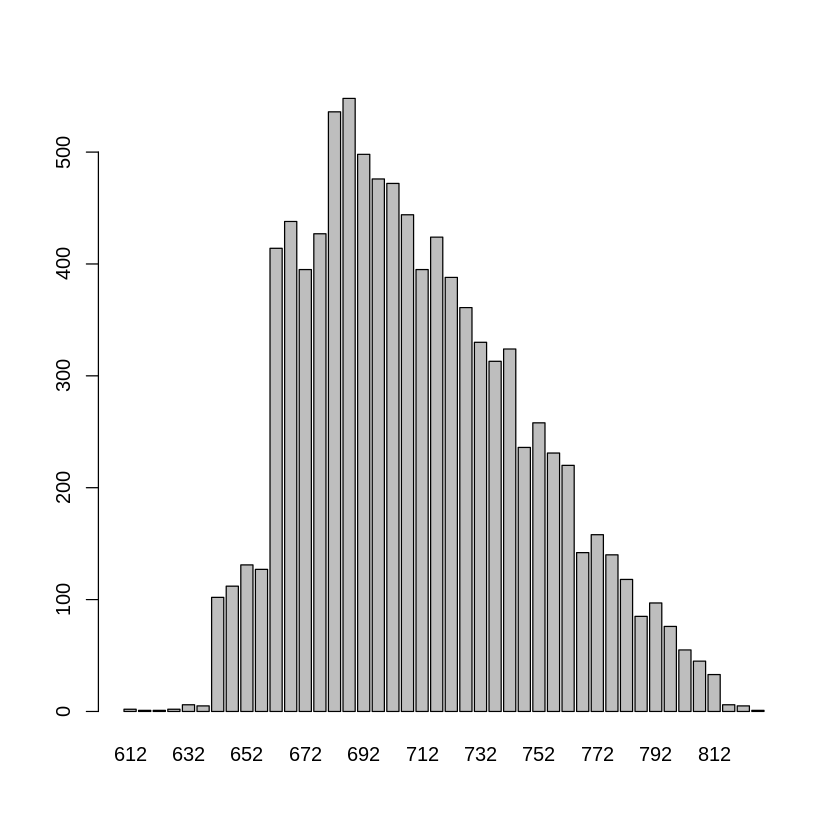

In [12]:
#Essa daqui é int mesmo
loans$fico %>%
 table() %>%
 barplot()

In [17]:
 #Convertendo em fator
 loans$purpose %<>% as.factor()

 loans$inq.last.6mths %<>% as.factor()
 loans$delinq.2yrs %<>% as.factor()
 loans$pub.rec %<>% as.factor()
 loans$not.fully.paid %<>% as.factor()
 loans$credit.policy %<>% as.factor()

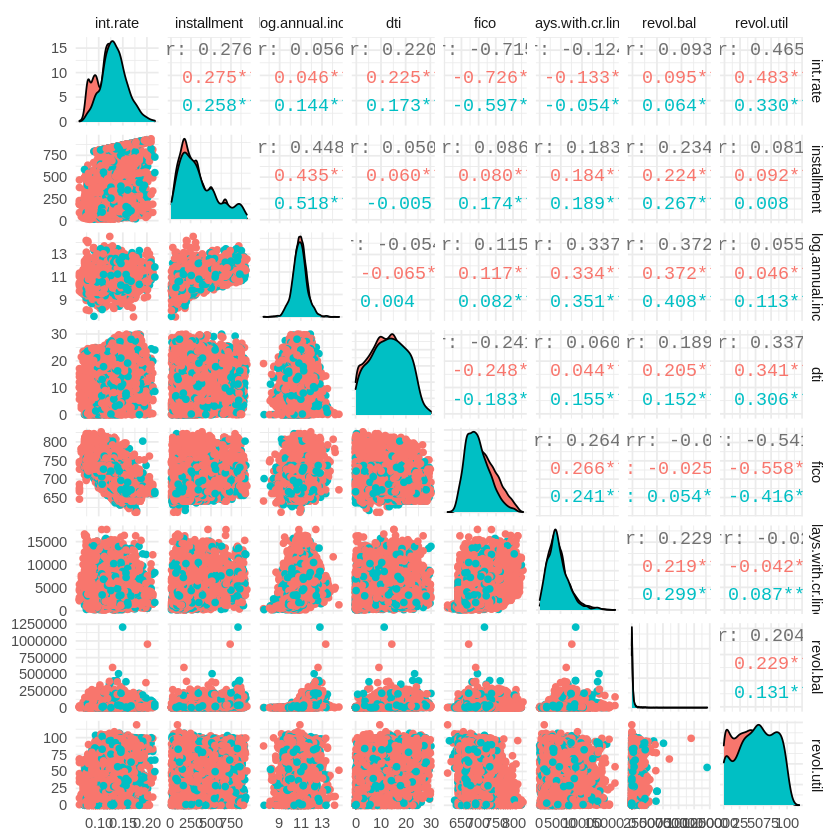

In [24]:
#Não consigo ver nada que eu considere interessante com esse recorte
#Não sei se olhando a representação multiplas dimensões vai ficar melhor, mas assim tem cara que o svm não vai ficar bom
GGally::ggpairs(loans,
                columns = which(sapply(loans, class) != "factor"),
                ggplot2::aes(colour=not.fully.paid)) +
        theme_minimal()

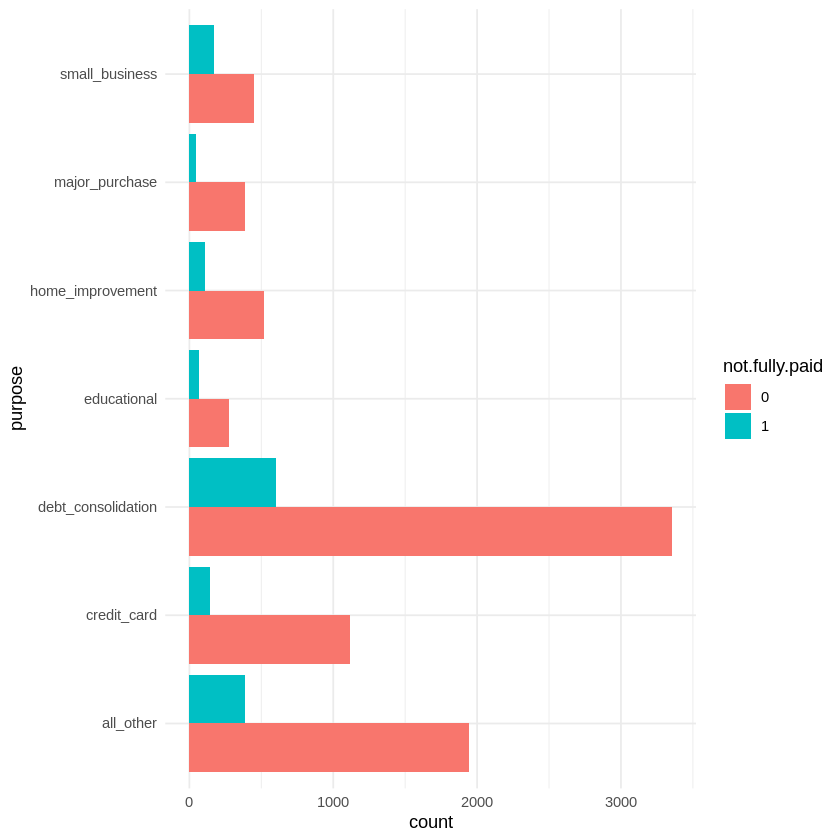

In [28]:
loans %>%
  ggplot() +
    aes(x = purpose, fill=not.fully.paid) +
    geom_bar(position='dodge') +
    coord_flip() +
    theme_minimal()
    

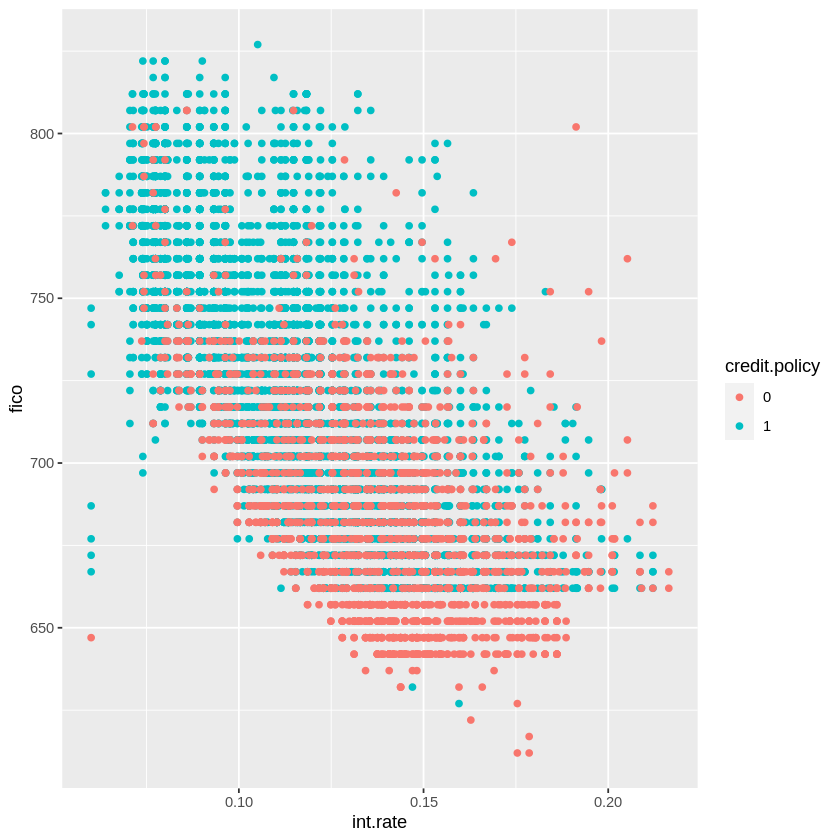

In [34]:
#Dependendo da variável que a gente usa, até conseguimos ver alguns grupos de pontos
loans %>%
  ggplot() +
    aes(x = int.rate, y = fico, colour = credit.policy) +
    geom_point()

In [43]:
#Vou separar os dados  em treino e teste
set.seed(513)
train = caTools::sample.split(loans$not.fully.paid, SplitRatio = .7)

loans_train = loans[ train,]
loans_test  = loans[!train,]

In [59]:
#Vou treinar o modelo para encontrar o hiperplano que melhor separa os dados
svm_model = e1071::svm(not.fully.paid ~., data=loans_train)

summary(svm_model)


Call:
svm(formula = not.fully.paid ~ ., data = loans_train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2933

 ( 1860 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [60]:
predicted = predict(svm_model, loans_test[,-ncol(loans_test)])

#Todo mundo em um grupo, ta muito ruim isso daqui
cm = table(predicted, loans_test$not.fully.paid)
cm

         
predicted    0    1
        0 2413  460
        1    0    0

In [78]:
#Essa parte demora
svm_tuned = e1071::tune(svm, train.x = not.fully.paid ~.,
                        kernel = 'radial', data = loans_train,
                        ranges = list(cost  = c(0.7, 1, 10),
                                      gamma = c(.02, 0.1))
                        )
svm_tuned %>% summary()


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  0.7  0.02

- best performance: 0.1600222 

- Detailed performance results:
  cost gamma     error dispersion
1  0.7  0.02 0.1600222 0.01622480
2  1.0  0.02 0.1600222 0.01622480
3 10.0  0.02 0.1604698 0.01584252
4  0.7  0.10 0.1600222 0.01622480
5  1.0  0.10 0.1600222 0.01622480
6 10.0  0.10 0.1744918 0.01120756


In [66]:
#Esse tuning não ajudou muito, mas vou deixar por isso pq o tune demora muito e provavelmente a melhor opção não seja SVM
svm_model = e1071::svm(not.fully.paid ~., data=loans_train, cost=10, gamma=0.1)
predicted = predict(svm_model, loans_test[,-ncol(loans_test)])

#Todo mundo em um grupo
cm = table(predicted, loans_test$not.fully.paid)
cm

         
predicted    0    1
        0 2349  410
        1   64   50

In [67]:
accuracy = sum(diag(cm)) / sum(cm)
accuracy

[1] 0.8350157

In [68]:
sensitivity = cm[1,1] / sum(cm[,1])
sensitivity

[1] 0.973477

In [69]:
specificity = cm[2,2] / sum(cm[,2])
specificity

[1] 0.1086957

---
# **K-Means Method**
---

[Whine Quality Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

*  fixed acidity
*  volatile acidity
*  citric acid
*  residual sugar
*  chlorides
*  free sulfur dioxide
*  total sulfur dioxide
*  density
*  pH
*  sulphates
*  alcohol


*  quality (score between 0 and 10)

In [ ]:
#####################################################################
#                                                                   #
###                                                               ###
#####                      K-Means Project                      #####
###                                                               ###
#                                                                   #
#####################################################################

In [ ]:
install.packages("cluster")
library("cluster")

In [70]:
#Dataset
winer = rio::import('https://raw.githubusercontent.com/RamomNF/GoogleColab/master/ML-Bootcamp/R/winequality-red.csv'  )
winew = rio::import('https://raw.githubusercontent.com/RamomNF/GoogleColab/master/ML-Bootcamp/R/winequality-white.csv')

In [71]:
#Vou combinar os dados e colocar os labels
#Nesse caso didático nós sabemos os labels, mas em um exemplo real de K-Means o que nós queremos é criar grupos
wine = 
  winer %>%
  bind_rows(winew) %>%
  mutate(label = c(rep('red', nrow(winer)),
                   rep('white', nrow(winew))) 
        )

In [73]:
wine %>%
  head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [74]:
wine %>%
  summary()

 fixed acidity    volatile acidity  citric acid     residual sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [75]:
wine %>%
  is.na() %>%
  summary()

 fixed acidity   volatile acidity citric acid     residual sugar 
 Mode :logical   Mode :logical    Mode :logical   Mode :logical  
 FALSE:6497      FALSE:6497       FALSE:6497      FALSE:6497     
 chlorides       free sulfur dioxide total sulfur dioxide  density       
 Mode :logical   Mode :logical       Mode :logical        Mode :logical  
 FALSE:6497      FALSE:6497          FALSE:6497           FALSE:6497     
     pH          sulphates        alcohol         quality       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:6497      FALSE:6497      FALSE:6497      FALSE:6497     
   label        
 Mode :logical  
 FALSE:6497     

In [76]:
wine %>%
  glimpse()

Rows: 6,497
Columns: 13
$ `fixed acidity`        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, …
$ `volatile acidity`     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.60…
$ `citric acid`          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00…
$ `residual sugar`       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6…
$ chlorides              <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.06…
$ `free sulfur dioxide`  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17,…
$ `total sulfur dioxide` <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 1…
$ density                <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978…
$ pH                     <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39…
$ sulphates              <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47…
$ alcohol                <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, …
$ quality                <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5…
$ label                  <ch

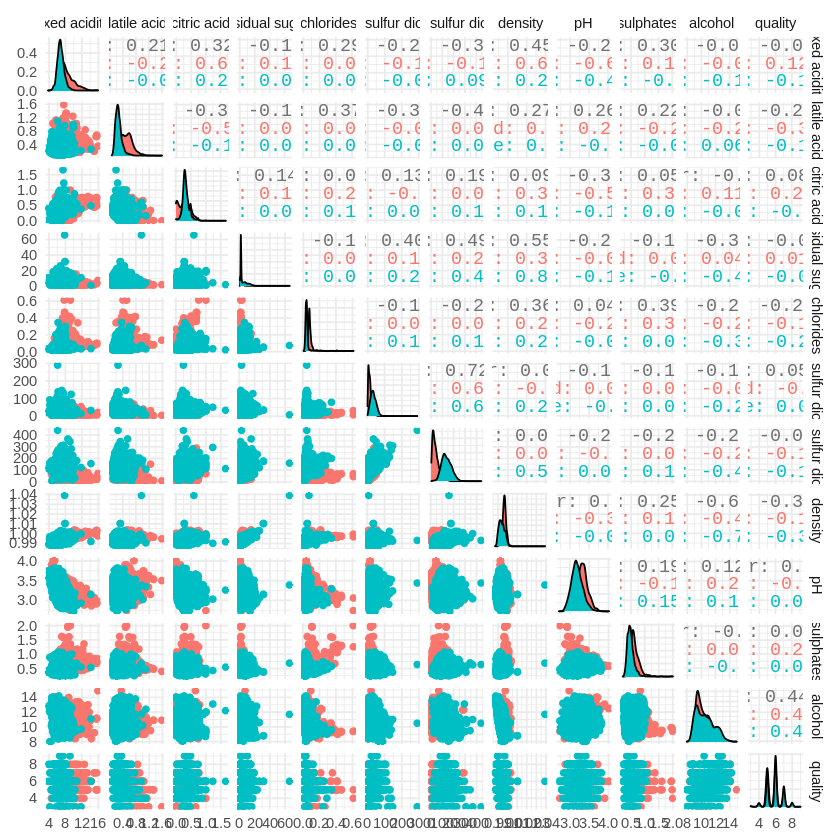

In [82]:
#Agora nós sabemos os labels
GGally::ggpairs(wine,
                columns = 1:12,
                ggplot2::aes(colour=label)) +
        theme_minimal()

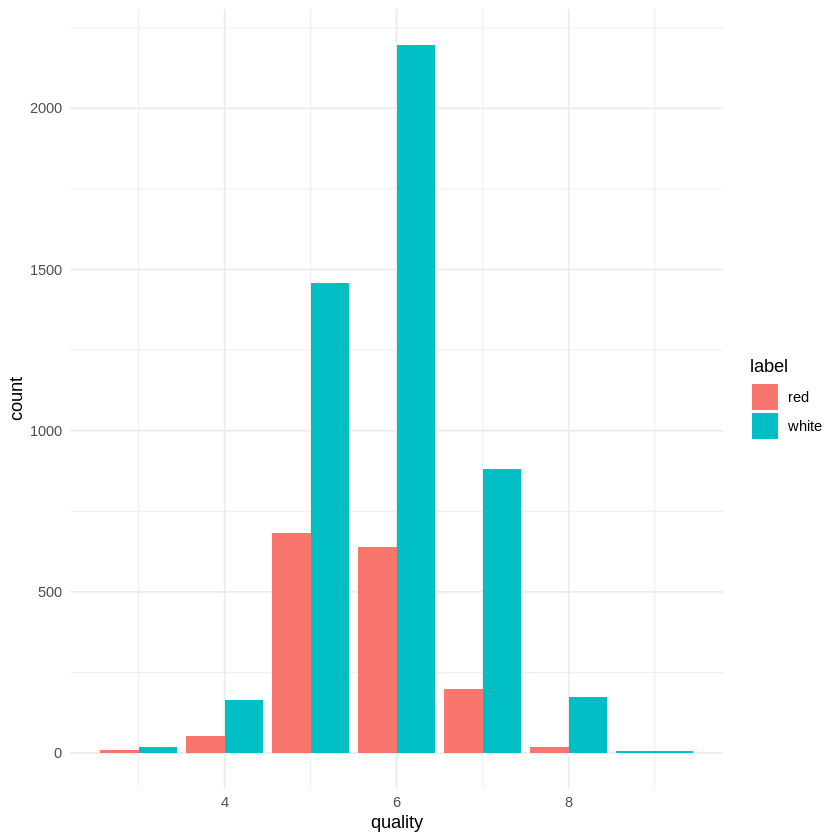

In [80]:
#Fiquei curioso para ver qualidade e teor de alcool para os tipos de vinho
wine %>%
  ggplot() +
    aes(x = quality, fill=label) +
    geom_bar(position = 'dodge') +
    theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



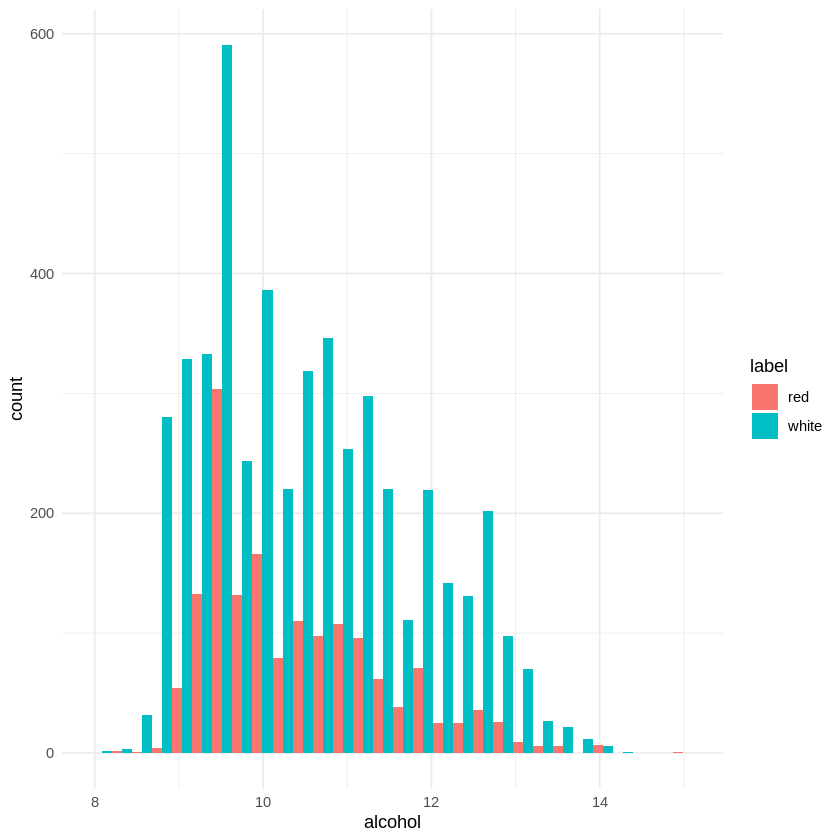

In [81]:
wine %>%
  ggplot() +
    aes(x = alcohol, fill=label) +
    geom_histogram(position = 'dodge') +
    theme_minimal()

In [84]:
#Vou separar o conjunto de dados para o agrupamento/clusterização
wine_train = wine[,-ncol(wine)]

In [95]:
#Tenho o privilégio de conhecer a natureza do problema e saber que preciso separar os dados em dois grupos
wine_cluster = kmeans(wine_train, 2, nstart = 12)

wine_cluster %>% summary()

             Length Class  Mode   
cluster      6497   -none- numeric
centers        24   -none- numeric
totss           1   -none- numeric
withinss        2   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            2   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

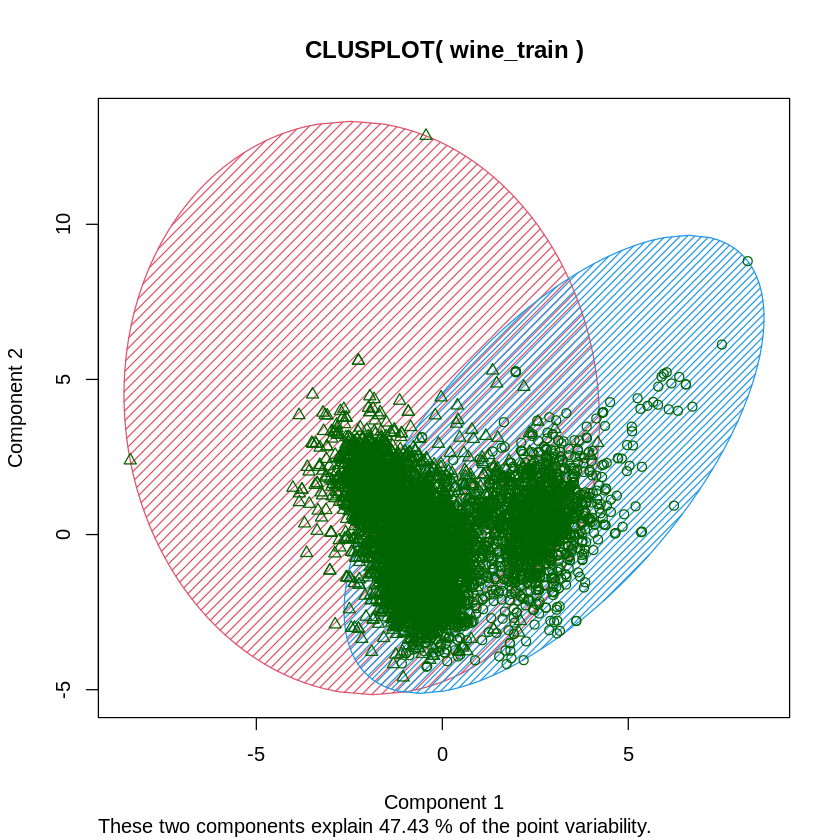

In [96]:
#As duas primeiras PCA's explicam 47.43%
cluster::clusplot(wine_train, wine_cluster$cluster, color=TRUE, shade=TRUE, labels=0, lines=0)

In [97]:
#Vamos usar o privilégio de conhecer os labels para testar a qualidade do agrupamento
cm = table(wine_cluster$cluster, wine$label)
cm

   
     red white
  1 1514  1294
  2   85  3604

In [98]:
accuracy = sum(diag(cm)) / sum(cm)
accuracy

[1] 0.7877482

In [99]:
sensitivity = cm[1,1] / sum(cm[,1])
sensitivity

[1] 0.9468418

In [100]:
specificity = cm[2,2] / sum(cm[,2])
specificity

[1] 0.7358105

---
# **Neural Networks**
---

 [Bank Authentication Dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

*  variance of Wavelet Transformed image (continuous)

*  skewness of Wavelet Transformed image (continuous)

*  curtosis of Wavelet Transformed image (continuous)

*  entropy of image (continuous)

*  class (integer)

In [101]:
#####################################################################
#                                                                   #
###                                                               ###
#####                    Neural Nets Project                    #####
###                                                               ###
#                                                                   #
#####################################################################

In [111]:
install.packages("neuralnet")
library("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [103]:
banka = rio::import('https://raw.githubusercontent.com/RamomNF/GoogleColab/master/ML-Bootcamp/R/bank_note_data.csv')

banka %>%
  head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3.62160,8.6661,-2.8073,-0.44699,0
2,4.54590,8.1674,-2.4586,-1.46210,0
3,3.86600,-2.6383,1.9242,0.10645,0
4,3.45660,9.5228,-4.0112,-3.59440,0
5,0.32924,-4.4552,4.5718,-0.98880,0
6,4.36840,9.6718,-3.9606,-3.16250,0


In [104]:
banka %>%
  summary()

   Image.Var         Image.Skew        Image.Curt         Entropy       
 Min.   :-7.0421   Min.   :-13.773   Min.   :-5.2861   Min.   :-8.5482  
 1st Qu.:-1.7730   1st Qu.: -1.708   1st Qu.:-1.5750   1st Qu.:-2.4135  
 Median : 0.4962   Median :  2.320   Median : 0.6166   Median :-0.5867  
 Mean   : 0.4337   Mean   :  1.922   Mean   : 1.3976   Mean   :-1.1917  
 3rd Qu.: 2.8215   3rd Qu.:  6.815   3rd Qu.: 3.1793   3rd Qu.: 0.3948  
 Max.   : 6.8248   Max.   : 12.952   Max.   :17.9274   Max.   : 2.4495  
     Class       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.4446  
 3rd Qu.:1.0000  
 Max.   :1.0000  

In [105]:
banka %>%
  is.na() %>%
  summary()

 Image.Var       Image.Skew      Image.Curt       Entropy       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:1372      FALSE:1372      FALSE:1372      FALSE:1372     
   Class        
 Mode :logical  
 FALSE:1372     

In [106]:
banka %>%
  glimpse()

Rows: 1,372
Columns: 5
$ Image.Var  <dbl> 3.62160, 4.54590, 3.86600, 3.45660, 0.32924, 4.36840, 3.59…
$ Image.Skew <dbl> 8.6661, 8.1674, -2.6383, 9.5228, -4.4552, 9.6718, 3.0129, …
$ Image.Curt <dbl> -2.80730, -2.45860, 1.92420, -4.01120, 4.57180, -3.96060, …
$ Entropy    <dbl> -0.44699, -1.46210, 0.10645, -3.59440, -0.98880, -3.16250,…
$ Class      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


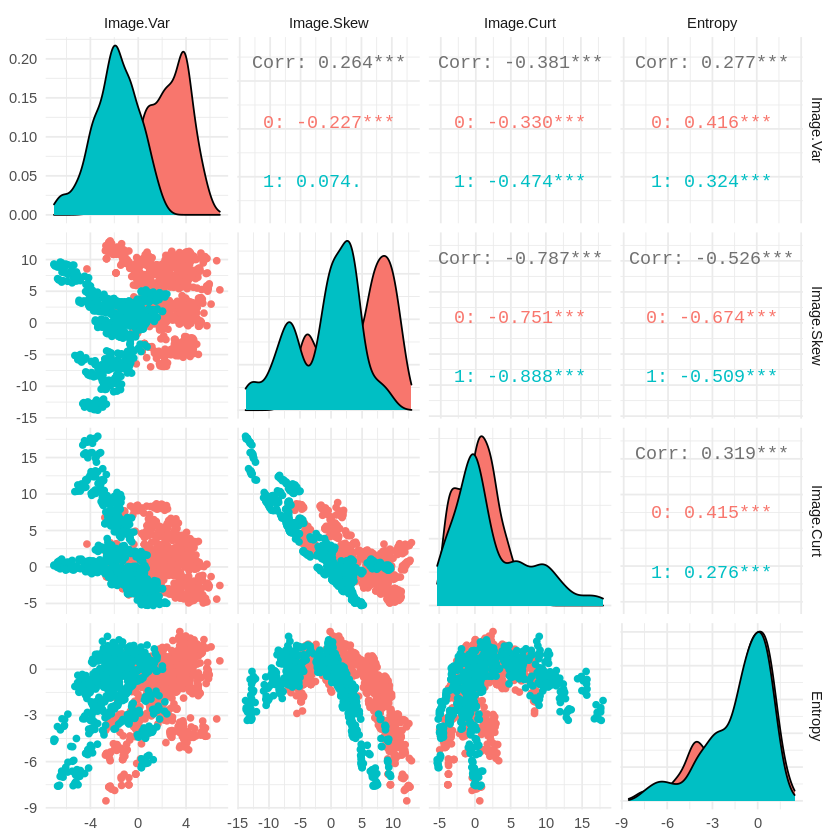

In [109]:
#Os dados não são muito interpretáveis, mas podemos ver a relação entre as variáveis
#Parece ter umas relações bem legais, bem não lineares
GGally::ggpairs(banka,
                columns = 1:4,
                ggplot2::aes(colour=as.factor(Class))) +
        theme_minimal()

In [112]:
#Rescalonando os dados
maxs = apply(banka, 2, max)
mins = apply(banka, 2, min)

scaled_banka = scale(banka, center=mins, scale= maxs-mins) %>% as.data.frame()

In [113]:
#Vou separar os dados  em treino e teste
set.seed(437)
train = caTools::sample.split(scaled_banka$Class, SplitRatio = .7)

banka_train = scaled_banka[ train,]
banka_test  = scaled_banka[!train,]

In [117]:
banka_nn = neuralnet::neuralnet(Class ~ Image.Var + Image.Skew + Image.Curt + Entropy,
                                data=banka_train, hidden = 10, linear.output=FALSE)

plot(banka_nn)

In [127]:
#O valor de class é 0 e 1, então já está na escala
predicted = compute(banka_nn, banka_test[,1:4])
predicted = predicted$net.result %>% round()

In [129]:
#Cacilds, ta bom demais pra ser verdade kkkkk
cm = table(predicted, banka_test$Class)
cm

         
predicted   0   1
        0 229   0
        1   0 183

In [130]:
accuracy = sum(diag(cm)) / sum(cm)
accuracy

[1] 1

In [131]:
sensitivity = cm[1,1] / sum(cm[,1])
sensitivity

[1] 1

In [132]:
specificity = cm[2,2] / sum(cm[,2])
specificity

[1] 1